### Simple 2 layer neural network implementation for a classification problem
NN : Input layer -> 1. Hidden layer -> activation ->  2. Hidden layer -> softmax -> output


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from get_data import create_data2D, get_plot_data, shuffle_and_get_batch_data
from activation_functions import sigmoid, sigmoid_d, relu, relu_d, tanh, tanh_d, softmax

Create new data for the NN. There are 3 options: linear, circle and check-board

In [2]:
X_data, Y_data = create_data2D(num_points = 300, data_type = 'circle', radius=10)
X_test, Y_test = create_data2D(num_points = 100, data_type = 'circle', radius=10)

# Create mesh grid for plotting the output of the NN
X_plot = get_plot_data(-30, 30, 2)

X_2_plot = X_data
Y_2_plot = Y_data

# X_2_plot = X_test
# Y_2_plot = Y_test

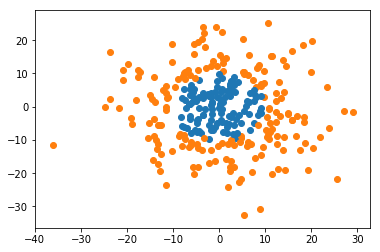

In [3]:
# Plot the training or test data
for x, nout in zip(X_2_plot, Y_2_plot):
    c = '#1f77b4'
    if nout[1] > 0.5:
        c = '#ff7f0e'
    plt.scatter(x[0], x[1], color = c)

plt.show()

Set network parameters. Use ```plot_output_during_training``` to visualize the nn output during training.

In [4]:
# Training parameters
epochs = 1000
batch_size = 30
learn_rate = 0.005

# NN parameters
num_hidden_units_1 = 4
num_hidden_units_2 = 4
num_features = X_data.shape[1]
num_output = Y_data.shape[1]
data_size = X_data.shape[0]

# Output parameters
last_loss = None
plot_output_during_training = True

# Set activation function. Options are: sigmoid, relu, tanh and their derivatives
activation   = relu
activation_d = relu_d

In [5]:
# Weights and biases
w_hidden_1 = np.random.normal(0, 1 / (num_features**0.5), (num_features, num_hidden_units_1))
b_hidden_1 = np.zeros(num_hidden_units_1)

w_hidden_2 = np.random.normal(0, 1 / (num_features**0.5), (num_hidden_units_1, num_hidden_units_2))
b_hidden_2 = np.zeros(num_hidden_units_2)

w_out_hidden = np.random.normal(0, 1 / (num_features**0.5), (num_hidden_units_2, num_output))
b_out_hidden = np.zeros(num_output)

### Train the network

Train loss:  0.244749672691
Prediction accuracy: 56.00000000000001 %


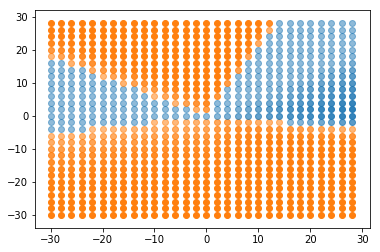

Train loss:  0.14549121204
Prediction accuracy: 78.0 %


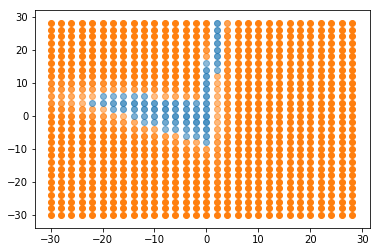

Train loss:  0.100013818979
Prediction accuracy: 88.0 %


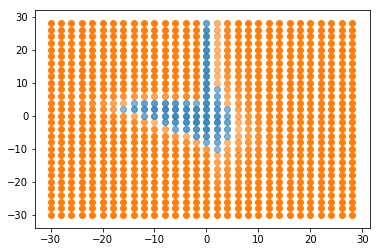

Train loss:  0.0898369544546
Prediction accuracy: 88.0 %


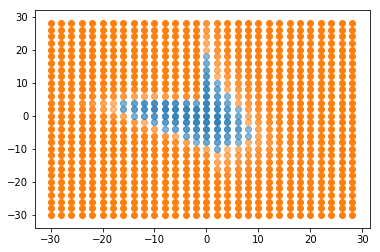

Train loss:  0.0790567914841
Prediction accuracy: 91.0 %


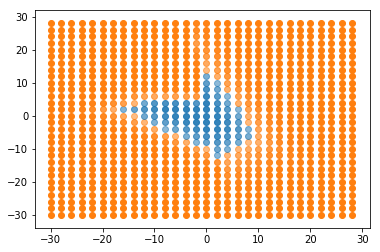

Train loss:  0.0810025393992   WARNING - Loss Increasing
Prediction accuracy: 90.0 %


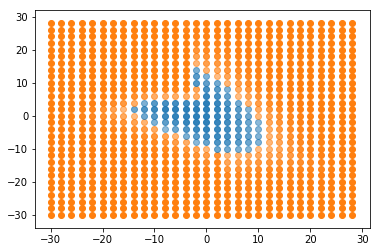

Train loss:  0.0649813715288
Prediction accuracy: 91.0 %


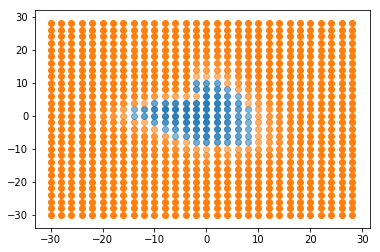

Train loss:  0.0474478328116
Prediction accuracy: 92.0 %


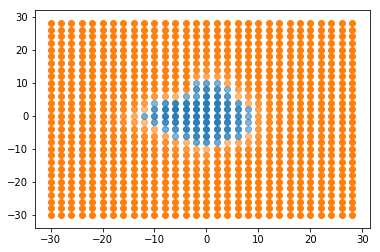

Train loss:  0.0396839369093
Prediction accuracy: 97.0 %


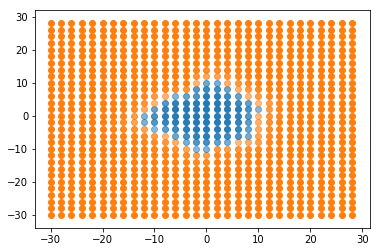

Train loss:  0.0341326464482
Prediction accuracy: 96.0 %


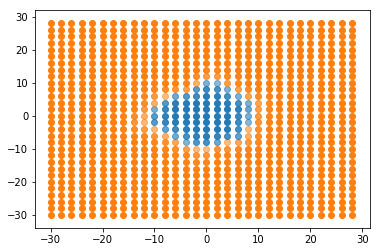

Train loss:  0.0360351191686   WARNING - Loss Increasing
Prediction accuracy: 94.0 %


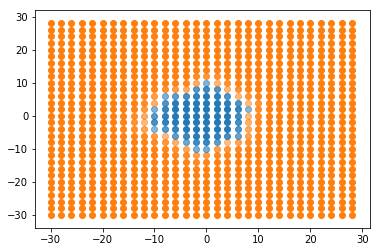

In [6]:
for e in range(epochs + 1):
    for b in range(data_size // batch_size):
        X,Y = shuffle_and_get_batch_data(X_data, Y_data, batch_size)

        # Forward propagation
        hidden_output_1 = activation(np.dot(X, w_hidden_1) + b_hidden_1)
        hidden_output_2 = activation(np.dot(hidden_output_1, w_hidden_2) + b_hidden_2)
        nn_output       = softmax(np.dot(hidden_output_2, w_out_hidden) + b_out_hidden)

        # Backward propagation
        #   Step back through the network and calculate errors and deltas for the weights and biases
        hidden_out_error = Y - nn_output
        d_w_out_hidden   = np.dot(hidden_output_2.T, hidden_out_error)

        hidden_2_error  = np.multiply(np.matmul(hidden_out_error, w_out_hidden.T), activation_d(hidden_output_2))
        d_w_hidden_2    = np.dot(hidden_output_1.T, hidden_2_error)

        hidden_in_error  = np.multiply(np.matmul(hidden_2_error, w_hidden_2.T), activation_d(hidden_output_1))
        d_w_in_hidden    = np.dot(X.T, hidden_in_error)

        # Update
        w_out_hidden += (learn_rate / batch_size) * d_w_out_hidden
        b_out_hidden += (learn_rate / batch_size) * hidden_out_error.sum(axis=0)

        w_hidden_2   += (learn_rate / batch_size) * d_w_hidden_2
        b_hidden_2   += (learn_rate / batch_size) * hidden_2_error.sum(axis=0)

        w_hidden_1   += (learn_rate / batch_size) * d_w_in_hidden
        b_hidden_1   += (learn_rate / batch_size) * hidden_in_error.sum(axis=0)

    # Mean square error loss calculated on the training set
    if e % (epochs / 10) == 0:
        hidden_output_1 = activation(np.dot(X_test, w_hidden_1) + b_hidden_1)
        hidden_output_2 = activation(np.dot(hidden_output_1, w_hidden_2) + b_hidden_2)
        nn_output       = softmax(np.dot(hidden_output_2, w_out_hidden) + b_out_hidden)

        loss = np.mean((nn_output - Y_test) ** 2)
        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss

        # Create an array with the wrong outputs from the NN and compare the length to the test data
        diff_nn_y = Y_test[(np.round(nn_output) != Y_test).all(axis=1)]
        print("Prediction accuracy: {} %".format((1 - (len(diff_nn_y)/len(Y_test)))*100))

        if plot_output_during_training:
            X_2_plot = X_plot

            hidden_output_1 = activation(np.dot(X_2_plot, w_hidden_1) + b_hidden_1)
            hidden_output_2 = activation(np.dot(hidden_output_1, w_hidden_2) + b_hidden_2)
            nn_output       = softmax(np.dot(hidden_output_2, w_out_hidden) + b_out_hidden)

            # Plot the network output
            for x, nout in zip(X_2_plot,nn_output):
                c = '#1f77b4'
                alpha_ = nout[0]
                if nout[1] > 0.5:
                    c = '#ff7f0e'
                    alpha_ = nout[1]
                plt.scatter(x[0], x[1], color = c, alpha = alpha_)

            plt.show()


Visualize the output

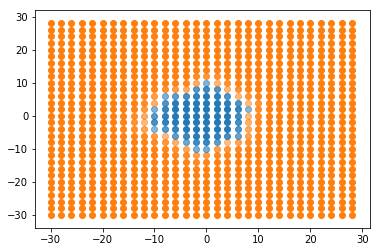

In [7]:
X_2_plot = X_plot

hidden_output_1 = activation(np.dot(X_2_plot, w_hidden_1) + b_hidden_1)
hidden_output_2 = activation(np.dot(hidden_output_1, w_hidden_2) + b_hidden_2)
nn_output       = softmax(np.dot(hidden_output_2, w_out_hidden) + b_out_hidden)

for x, nout in zip(X_2_plot,nn_output):
    c = '#1f77b4'
    alpha_ = nout[0]
    if nout[1] > 0.5:
        c = '#ff7f0e'
        alpha_ = nout[1]
        # print(alpha_)
    plt.scatter(x[0], x[1], color = c, alpha = alpha_)

plt.show()

Visualize the output on the test data

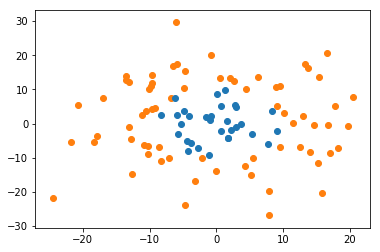

In [8]:
X_2_plot = X_test

for x, nout in zip(X_2_plot,Y_test):
    c = '#1f77b4'
    alpha_ = nout[0]
    if nout[1] > 0.5:
        c = '#ff7f0e'
        alpha_ = nout[1]
        # print(alpha_)
    plt.scatter(x[0], x[1], color = c, alpha = alpha_)

plt.show()